In [14]:
# importing the necessary libraries 
import nltk
import numpy as np
import matplotlib.pyplot as plt

# we would be needing the lemmatizer 
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [15]:
# setting up all our variables 

wordnet_lemmatizer = WordNetLemmatizer()
titles = [line.rstrip() for line in open('all_book_titles.txt')]
# we would be removing certain stopwords that we don't need in our data
stopwords = set(w.rstrip() for w in open('stopwords.txt'))
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application','approach',
    'card', 'access', 'package', 'plus', 'etext', 'breif', 'vol',
    'fundamental', 'guide', 'essential', 'printed', 'third', 'second', 'fourth',
})

In [16]:
# defining our tokenizer 

def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) #split the string inot words (tokens)
    tokens = [t for t in tokens if len(t)>2] # remove words shorter than 2, cause probably they are useless
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens ] # put the words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove the stopwords 
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens 


In [20]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1 
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        err_count +=1
                

In [22]:
# converting the tokens to vectors so that mathematical computations
# can be performed on the data 

def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N))
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1 

    

In [23]:
# using the sematic analysis tool provided by sklearn 
svd = TruncatedSVD()
Z = svd.fit_transform(X)

TypeError: annotate() missing 1 required positional argument: 'text'

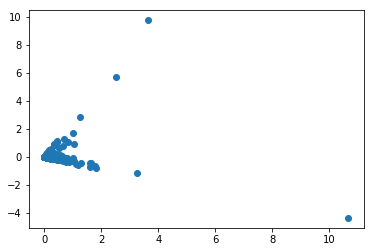

In [27]:
# plotting the results on the graph

plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()